In [1]:
import pandas as pd


In [2]:
#Loading the file and getting information about the structure of the dataset using the .info() function
clinical = pd.read_csv('clinical_dataset.csv',delimiter=';')
clinical.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          540 non-null    int64  
 1   fried                            540 non-null    object 
 2   gender                           540 non-null    object 
 3   age                              540 non-null    int64  
 4   hospitalization_one_year         540 non-null    int64  
 5   hospitalization_three_years      540 non-null    int64  
 6   ortho_hypotension                540 non-null    object 
 7   vision                           540 non-null    object 
 8   audition                         540 non-null    object 
 9   weight_loss                      538 non-null    object 
 10  exhaustion_score                 540 non-null    int64  
 11  raise_chair_time                 539 non-null    float64
 12  balance_single        

### The clinical dataset is composed of 540 instances (rows) and 55 features (colunns) both numerical (integers and floats) and categorical. There is also a boolean feature which essentially is also a categorical attribute (Yes or No)

In [3]:
clinical.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,Non frail,F,75,0,0,No,Sees moderately,Hears well,No,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5,0,5
1,1002,Pre-frail,M,73,0,1,No,Sees moderately,Hears moderately,No,...,2 - A little worse,3.3,> 2 h and < 5 h per week,Never smoked,14.0,6.0,26.0,12,0,4
2,1003,Pre-frail,M,72,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9,0,3
3,1004,Frail,F,88,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,7.3,< 2 h per week,Never smoked,21.0,5.5,20.0,11,0,8
4,1005,Pre-frail,F,83,0,4,Yes,Sees moderately,Hears poorly,No,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12,0,4


###  Splitting the column names in two different lists categorical, numerical

In [4]:
categorical_column_names = clinical.select_dtypes(include=['object','bool']).columns
print("categorical features",categorical_column_names,len(categorical_column_names))
numerical_column_names = clinical.select_dtypes(include=['int64','float64']).columns
print("numerical features",numerical_column_names,len(numerical_column_names))
print("Total number of columns",len(numerical_column_names)+len(categorical_column_names))


categorical features Index(['fried', 'gender', 'ortho_hypotension', 'vision', 'audition',
       'weight_loss', 'balance_single', 'gait_optional_binary',
       'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity',
       'memory_complain', 'sleep', 'living_alone', 'leisure_club',
       'house_suitable_participant', 'house_suitable_professional',
       'health_rate', 'health_rate_comparison', 'activity_regular', 'smoking'],
      dtype='object') 21
numerical features Index(['part_id', 'age', 'hospitalization_one_year',
       'hospitalization_three_years', 'exhaustion_score', 'raise_chair_time',
       'gait_get_up', 'gait_speed_4m', 'falls_one_year',
       'fractures_three_years', 'bmi_score', 'bmi_body_fat', 'waist',
       'lean_body_mass', 'screening_score', 'cognitive_total_score',
       'mmse_total_score', 'depression_total_score', 'anxiety_perception',
       'leisure_out', 'social_visits', 'social_calls', 'social_phone',
       'social_skype', 'social_text

### The total number of collumns is indeed 55 so we have not missed any column name.

### In order to start cleaning the dataset we need to inspect the different features, starting with the categorical ones:

In [5]:
for categorical_name in categorical_column_names:
    print(clinical[categorical_name].value_counts())
    print("\n")
   

fried
Pre-frail    227
Non frail    213
Frail        100
Name: count, dtype: int64


gender
F    328
M    212
Name: count, dtype: int64


ortho_hypotension
No     470
Yes     70
Name: count, dtype: int64


vision
Sees well          364
Sees moderately    152
Sees poorly         24
Name: count, dtype: int64


audition
Hears well          393
Hears moderately    118
Hears poorly         29
Name: count, dtype: int64


weight_loss
No     494
Yes     44
Name: count, dtype: int64


balance_single
>5 sec                 333
<5 sec                 157
test non realizable     49
Name: count, dtype: int64


gait_optional_binary
False    493
True      47
Name: count, dtype: int64


gait_speed_slower
No                   387
Yes                  149
Test not adequate      4
Name: count, dtype: int64


grip_strength_abnormal
No     300
Yes    240
Name: count, dtype: int64


low_physical_activity
No     452
Yes     88
Name: count, dtype: int64


memory_complain
No     399
Yes    102
Name: count, dty

### THERE ARE TWO WAYS FALSE VALUES APPEAR IN CATEGORICAL FEATURES: 'Test not adequate', 'test non realizable'. We replace these two string values with the string value 'None'. From the output of cell #2, we are informed that there are Null values in some categorical features. We also replace them with the value 'None' in order to have homogeneity among them.

In [6]:
strings_to_replace = ['Test not adequate','test non realizable']

for column in categorical_column_names:
    clinical[column] = clinical[column].apply(lambda x: 'None' if x in strings_to_replace or pd.isna(x) else x)

In [7]:
for categorical_name in categorical_column_names:
    print(clinical[categorical_name].value_counts())
    print("\n")

fried
Pre-frail    227
Non frail    213
Frail        100
Name: count, dtype: int64


gender
F    328
M    212
Name: count, dtype: int64


ortho_hypotension
No     470
Yes     70
Name: count, dtype: int64


vision
Sees well          364
Sees moderately    152
Sees poorly         24
Name: count, dtype: int64


audition
Hears well          393
Hears moderately    118
Hears poorly         29
Name: count, dtype: int64


weight_loss
No      494
Yes      44
None      2
Name: count, dtype: int64


balance_single
>5 sec    333
<5 sec    157
None       50
Name: count, dtype: int64


gait_optional_binary
False    493
True      47
Name: count, dtype: int64


gait_speed_slower
No      387
Yes     149
None      4
Name: count, dtype: int64


grip_strength_abnormal
No     300
Yes    240
Name: count, dtype: int64


low_physical_activity
No     452
Yes     88
Name: count, dtype: int64


memory_complain
No      399
Yes     102
None     39
Name: count, dtype: int64


sleep
No sleep problem            297


### We have replaced the 'Test not adequate', 'test non realizable' false values with 'None' and we have also replaced the Null values with 'None'. We can now view both as one single entity, the entity of a missing value (to be exact, having them replaced with the string 'None' makes them not Null because they do have a value, we could have replaced them with the None datatype and make them truly null values but we choose not to, so we can visualize those missing values, as seen above). By inspecting the output of the previous cell, the following categorical features have missing values:

### weight_loss --> 2
### balance_single --> 50
### gait_speed_slower --> 4
### memory_complain --> 39
### sleep -->3
### living_alone --> 1
### leisure_club --> 1
### house_suitable_participant -->98
### house_suitable_professional -->98
### health_rate --> 1
### health_rate_comparison --> 1
### activity_regular --> 2
### smoking --> 1



### We are going to drop all the instances that have missing values in all the above categorical features except 'balance_single', 'memory_complain', 'house_suitable_participant', 'house_suitable_professional' where the number of them is large and droping them would negatively impact our analysis - models trained on small datasets have usually bad performance and problems such as overfitting are common in such cases -. After we drop the instances mentioned, we will have 16 less instances (maximum) out of the original 540 .

In [8]:
columns_to_check = ['weight_loss','gait_speed_slower','sleep','living_alone','leisure_club','health_rate','health_rate_comparison','activity_regular','smoking']


In [9]:
for column in categorical_column_names:
    clinical[column] = clinical[column].apply(lambda x: None if x == 'None' else x) #so we can use dropna later on the next line
clinical.dropna(subset=columns_to_check, inplace=True)

In [10]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 0 to 539
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          526 non-null    int64  
 1   fried                            526 non-null    object 
 2   gender                           526 non-null    object 
 3   age                              526 non-null    int64  
 4   hospitalization_one_year         526 non-null    int64  
 5   hospitalization_three_years      526 non-null    int64  
 6   ortho_hypotension                526 non-null    object 
 7   vision                           526 non-null    object 
 8   audition                         526 non-null    object 
 9   weight_loss                      526 non-null    object 
 10  exhaustion_score                 526 non-null    int64  
 11  raise_chair_time                 526 non-null    float64
 12  balance_single             

### The only categorical features that have Null values are 'balance_single', 'memory_complain', 'house_suitable_participant' and 'house_suitable_professional' as expected. Further down, these Null values will be replaced with the string 'None' in order for an encoding algorithm to be used.

### The categorical features missing values are the following:
### balance_single --> 46
### memory_complain --> 37
### house_suitable_participant --> 93
### house_suitable_professional --> 93


### There are two different ways these missing values can be dealt with. The instances containing empty values in the above columns are dropped (but as mentioned before this will impact our analysis in a negative manner) or we try to predict them by training a classifier on the data. To be able to do that, we need to clean the numerical features.

### Cleaning the Numerical Columns: Numerical features have also false values:

In [11]:
count_999 = (clinical == 999).sum().sum()
count_999

122

### There are 122 cells in the dataframe that have the false value '999'. We are about to replace them with empty values.

In [12]:
for column in numerical_column_names:
    clinical[column] = clinical[column].apply(lambda x: None if x == 999 else x)

In [13]:
count_999 = (clinical == 999).sum().sum()
count_999

0

### As seen above, all '999' values have been set to None, we must now fill all missing numerical values. Empty values in columns that contain outliers, will be imputed using the median value (the mean value is not a good representative value when outliers exist) of the column values and for columns with no outliers, the mean value will be used instead.

### In order to differentiate between columns with and without outliers the z-score metric is used. Z-score is a statistical measure of how many standard deviations below or above the population mean a data point is. Python library 'scipy', contains a function used to compute the z-scores of an array like object, in our case the numerical columns. For each numerical column a z-score for each value of the column is computed and if the absolute value of it exceeds a threshold (in our case 3 standard deviations) we consider it an outlier for that column. If the total number of outliers contained in a column is bigger than a threshold (at least 5) then the column is considered a 'column with outliers' and it's missing values are imputed using the median. If not, the column is considered a 'column without outliers' and the mean value is used. The choice of the threshold values for the z-score and the number of outliers, that define whether a columns needs to be imputed using the median value or not, are somewhat arbitrarily chosen, especially the number of outliers. There is no standard rule to dictate what is the best choice for these values. One way to empirically find the best values, is by testing different pairs of values and keeping those that results in a dataset that the classifier thas is trained trained on, has the best performance.

### The z-score function cannot deal with missing values and so, for each numerical column we must only keep the rows that have no missing value in it. In the cell below, we create one dataframe for each numerical column, that contains the instances of the original clinical dataframe which do not contain Null values for that specific column, so we can use those 34 dataframes (the number of numerical features-columns is 34) to compute z scores for each column and infere whether a column has outliers or not. The dataframes are placed inside a dictionary as values, they keys to each dataframe is the name of the corresponding column.

In [14]:
not_none_df = {}
for column in numerical_column_names:
    not_none_df[column] = clinical[clinical[column].notna()]   
print(len(not_none_df))

34


In [15]:
from scipy import stats


In [16]:

outliers_per_column = 0
columns_with_outliers = []
columns_without_outliers = []
for column in numerical_column_names:
    z_scores_column = stats.zscore(not_none_df[column][column])
    z_scores_column_abs = [abs(z_score) for z_score in z_scores_column]
    largest_5_scores = sorted(z_scores_column_abs, reverse=True)[:5]   #define how many outliers a column must have to be imputed using the median instead of the mean value which is outlier sensitive
    for score in largest_5_scores:
      if score >= 3:                          #define the threshold above which an instance is considered an outlier
        outliers_per_column += 1
      else: 
        columns_without_outliers.append(column)
        break
    if outliers_per_column == len(largest_5_scores):
        columns_with_outliers.append(column)
    outliers_per_column = 0
 
        
        
        

        

            

In [17]:
print(len(columns_with_outliers),"columns with outliers",columns_with_outliers)
print(len(columns_without_outliers),"columns without outliers",columns_without_outliers)

21 columns with outliers ['hospitalization_three_years', 'raise_chair_time', 'gait_get_up', 'gait_speed_4m', 'fractures_three_years', 'waist', 'screening_score', 'cognitive_total_score', 'depression_total_score', 'leisure_out', 'social_calls', 'social_phone', 'social_skype', 'social_text', 'stairs_number', 'life_quality', 'alcohol_units', 'katz_index', 'comorbidities_count', 'comorbidities_significant_count', 'medication_count']
13 columns without outliers ['part_id', 'age', 'hospitalization_one_year', 'exhaustion_score', 'falls_one_year', 'bmi_score', 'bmi_body_fat', 'lean_body_mass', 'mmse_total_score', 'anxiety_perception', 'social_visits', 'pain_perception', 'iadl_grade']


### Columns in "columns_with_outliers" will be imputed using the median value and for columns in "columns_without_outliers" the mean value will be used instead. For the imputation process the SimpleImputer() class from the library scikit-learn is used.

In [18]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputers on the respective columns
clinical[columns_with_outliers] = median_imputer.fit_transform(clinical[columns_with_outliers])
clinical[columns_without_outliers] = mean_imputer.fit_transform(clinical[columns_without_outliers])


In [19]:
null_counts_numerical = clinical[numerical_column_names].isna().sum()

print(null_counts_numerical)

null_counts_categorical = clinical[categorical_column_names].isna().sum()

print(null_counts_categorical)

part_id                            0
age                                0
hospitalization_one_year           0
hospitalization_three_years        0
exhaustion_score                   0
raise_chair_time                   0
gait_get_up                        0
gait_speed_4m                      0
falls_one_year                     0
fractures_three_years              0
bmi_score                          0
bmi_body_fat                       0
waist                              0
lean_body_mass                     0
screening_score                    0
cognitive_total_score              0
mmse_total_score                   0
depression_total_score             0
anxiety_perception                 0
leisure_out                        0
social_visits                      0
social_calls                       0
social_phone                       0
social_skype                       0
social_text                        0
stairs_number                      0
life_quality                       0
p

### We have succesfully imputed all the missing numerical values.

### We can continue with the categorical feature analysis. As mentioned before, our strategy is to predict the missing categorical values. In order to do that, we need to train a classifier on the dataset. Most models don't work with categorical features so before training we need to encode them into numerical values. The encoder used does not work with missing values and that is why we temporarily convert all the missing categorical values to 'None' and then proceed with the encoding.

In [20]:
for column in categorical_column_names:
    clinical[column] = clinical[column].apply(lambda x: 'None' if pd.isna(x) else x)

In [21]:
null_counts_categorical = clinical[categorical_column_names].isna().sum()

print(null_counts_categorical)

fried                          0
gender                         0
ortho_hypotension              0
vision                         0
audition                       0
weight_loss                    0
balance_single                 0
gait_optional_binary           0
gait_speed_slower              0
grip_strength_abnormal         0
low_physical_activity          0
memory_complain                0
sleep                          0
living_alone                   0
leisure_club                   0
house_suitable_participant     0
house_suitable_professional    0
health_rate                    0
health_rate_comparison         0
activity_regular               0
smoking                        0
dtype: int64


### Out of the 21 categorical features, 20 of them are either ordinal or binary non ordinal. The ordinal features must be encoded in a way that preserves the meaningful order that desribes them (for example "Bad", "Good", "Best" --> 0,1,2 and not 1,0,2 because then the classifier will assume that "Best" is closer to "Bad" than it is to "Good", which obviously is not true ). In regards to the binary non ordinal features, such limitation does not exist because there is no order to consider, and due to them being binary and only receiving two different values, we can randomly specify that one value is 0 and the other is 1. Number 1 is as similar to 0 as number 0 is to 1 so although there is an order to the numbers we will not run to the previously mentioned problem. However some algorithms might assume that the category encoded as 1 is greater than the category encoded as 0 where obvisouly there is no such relation between them. A better way to encode binary non ordinal features and not having to worry about that, would be the method of OneHot, but because OneHot encoding creates two new columns for each binary column that gets encoded and because there are 9 of these columns, that would increase the number of the features by 9 (not 18, the original columns are dropped). Comparing the two approaches, I believe that the best choice is to keep the dimensions of the dataset as low as possible meaning that the binary non ordinal columns will be encoded using the first approach. Finally, there is a non binary and non ordinal categorical column ('smoking') which will be encoded using the OneHotEncoding method. One hot encoding works by replacing the original column with new columns, one for each of the unique values found in the original column. For example for the 'smoking' column where the categories are 'Never smoked', 'Past smoker (stopped at least 6 months)', 'Current smoker', three new columns (with the columns names being the category names) are replacing the original. The new columns contain binary values. If an instance belongs to the category 'Never Smoked' then in the column with the same name the value is 1 and the values in the other two collumns are 0. One Hot Encoding is used for non ordinal features to prevent the model from assuming non existing relationships.                      5r


### sciki-learn provides transformers for both ordinal ( OrdinalEncoder() ) and one hot encoding ( OneHotEncoder() ). Although, for the method of one hot a built in pandas function will be used instead. 

In [22]:
for categorical_name in categorical_column_names:
    print(clinical[categorical_name].value_counts())
    print("\n")
   

fried
Pre-frail    223
Non frail    208
Frail         95
Name: count, dtype: int64


gender
F    320
M    206
Name: count, dtype: int64


ortho_hypotension
No     459
Yes     67
Name: count, dtype: int64


vision
Sees well          355
Sees moderately    147
Sees poorly         24
Name: count, dtype: int64


audition
Hears well          382
Hears moderately    116
Hears poorly         28
Name: count, dtype: int64


weight_loss
No     483
Yes     43
Name: count, dtype: int64


balance_single
>5 sec    325
<5 sec    155
None       46
Name: count, dtype: int64


gait_optional_binary
False    482
True      44
Name: count, dtype: int64


gait_speed_slower
No     379
Yes    147
Name: count, dtype: int64


grip_strength_abnormal
No     293
Yes    233
Name: count, dtype: int64


low_physical_activity
No     443
Yes     83
Name: count, dtype: int64


memory_complain
No      389
Yes     100
None     37
Name: count, dtype: int64


sleep
No sleep problem            293
Occasional sleep problem    

In [23]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
# the dictionary keys specify the column and the values specify the order
ordinal_categorical_features_dict = {'fried':['Non frail','Pre-frail','Frail'],
                                     'gender':['F','M'],
                                     'ortho_hypotension':['No','Yes'],
                                     'vision':['Sees poorly','Sees moderately','Sees well'],
                                     'audition':['Hears poorly','Hears moderately','Hears well'],
                                     'weight_loss':['No','Yes'],
                                     'balance_single':['<5 sec','>5 sec','None'],
                                     'gait_optional_binary':[False,True],
                                     'gait_speed_slower':['No','Yes'],
                                     'grip_strength_abnormal':['No','Yes'],
                                     'low_physical_activity':['No','Yes'],
                                     'memory_complain':['No','Yes','None'],
                                     'sleep':['No sleep problem','Occasional sleep problem','Permanent sleep problem'],
                                     'living_alone':['No','Yes'],
                                     'leisure_club':['No','Yes'],
                                     'house_suitable_participant':['No','Yes','None'],
                                     'house_suitable_professional':['No','Yes','None'],
                                     'health_rate':['1 - Very bad','2 - Bad','3 - Medium','4 - Good','5 - Excellent'],
                                     'health_rate_comparison':['1 - A lot worse','2 - A little worse','3 - About the same','4 - A little better','5 - A lot better'],
                                     'activity_regular':['No','< 2 h per week','> 2 h and < 5 h per week','> 5 h per week']
                                    }

for column in ordinal_categorical_features_dict:
    encoder = OrdinalEncoder(categories=[ordinal_categorical_features_dict[column]],dtype=int)
    data = clinical[column].values.reshape(-1, 1)
    clinical[column] = encoder.fit_transform(data)  #encoded column
    



In [24]:
for column in categorical_column_names:
    print(clinical[column].value_counts())
    print('\n')

fried
1    223
0    208
2     95
Name: count, dtype: int64


gender
0    320
1    206
Name: count, dtype: int64


ortho_hypotension
0    459
1     67
Name: count, dtype: int64


vision
2    355
1    147
0     24
Name: count, dtype: int64


audition
2    382
1    116
0     28
Name: count, dtype: int64


weight_loss
0    483
1     43
Name: count, dtype: int64


balance_single
1    325
0    155
2     46
Name: count, dtype: int64


gait_optional_binary
0    482
1     44
Name: count, dtype: int64


gait_speed_slower
0    379
1    147
Name: count, dtype: int64


grip_strength_abnormal
0    293
1    233
Name: count, dtype: int64


low_physical_activity
0    443
1     83
Name: count, dtype: int64


memory_complain
0    389
1    100
2     37
Name: count, dtype: int64


sleep
0    293
1    139
2     94
Name: count, dtype: int64


living_alone
0    366
1    160
Name: count, dtype: int64


leisure_club
1    338
0    188
Name: count, dtype: int64


house_suitable_participant
1    414
2     93
0    

In [25]:
#lets also encode the last categorical column 'smoking'
clinical = pd.get_dummies(data=clinical, columns=['smoking'],dtype=int)   #one hot encoding
clinical.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,activity_regular,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count,smoking_Current smoker,smoking_Never smoked,smoking_Past smoker (stopped at least 6 months)
0,1001.0,0,0,75.0,0.0,0.0,0,1,2,0,...,2,1.0,6.0,31.0,5.0,0.0,5.0,0,1,0
1,1002.0,1,1,73.0,0.0,1.0,0,1,1,0,...,2,14.0,6.0,26.0,12.0,0.0,4.0,0,1,0
2,1003.0,1,1,72.0,0.0,0.0,0,1,1,0,...,1,21.0,6.0,26.0,9.0,0.0,3.0,0,0,1
3,1004.0,2,0,88.0,0.0,0.0,0,1,1,0,...,1,21.0,5.5,20.0,11.0,0.0,8.0,0,1,0
4,1005.0,1,0,83.0,0.0,4.0,1,1,0,0,...,3,0.0,6.0,30.0,12.0,0.0,4.0,1,0,0


In [26]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 0 to 539
Data columns (total 57 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   part_id                                          526 non-null    float64
 1   fried                                            526 non-null    int32  
 2   gender                                           526 non-null    int32  
 3   age                                              526 non-null    float64
 4   hospitalization_one_year                         526 non-null    float64
 5   hospitalization_three_years                      526 non-null    float64
 6   ortho_hypotension                                526 non-null    int32  
 7   vision                                           526 non-null    int32  
 8   audition                                         526 non-null    int32  
 9   weight_loss                          

### We have successfully encoded the last categorical attribute 'smoking'.

### There are still missing values in columns 'balance_single', 'memory_complain', 'house_suitable_participant' and 'house_suitable_professional'. These values were filled in with the temporary value 'None' and then they were encoded, in order to overcome the problem that OrdinalEncoder() is unable to deal with missing values. "None" is of course not a real category, it is just a placeholder. We have to replace all these values with a true empty value. From the way we chose to construct the dictionary 'ordinal_categorical_features_dict' we see that the "None" values have been encoded with the value 2.

In [27]:
clinical['balance_single'] = clinical['balance_single'].apply(lambda x: None if x == 2 else x)
clinical['memory_complain'] = clinical['memory_complain'].apply(lambda x: None if x == 2 else x)
clinical['house_suitable_participant'] = clinical['house_suitable_participant'].apply(lambda x: None if x == 2 else x)
clinical['house_suitable_professional'] = clinical['house_suitable_professional'].apply(lambda x: None if x == 2 else x)



In [28]:
null_counts_categorical = clinical[['balance_single','memory_complain','house_suitable_participant','house_suitable_professional']].isna().sum()

print(null_counts_categorical)

balance_single                 46
memory_complain                37
house_suitable_participant     93
house_suitable_professional    93
dtype: int64


### We have reached the point where it is time to create the sub - datasets on which we are going to train models to predict the missing categorical values on the features seen above. To obtain these datasets we need to filter the clinical dataset and retain only the rows that have no missing values and the reason is, as discussed before, that the classifiers cannnot be trained on empty values. Column 'part_id' exists just to index each instance - user and it has nothing to do with the predicted values. Therefore it is dropped. If we choose to keep it, the models might actually find patterns (relative to the values in column 'part_id') that don't exist resulting in models with worse performance.

In [29]:
clinical_no_id = clinical.drop(columns='part_id')

In [30]:
sub_set = clinical_no_id.dropna(subset=['balance_single','memory_complain','house_suitable_participant','house_suitable_professional'])

In [31]:
sub_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 0 to 539
Data columns (total 56 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   fried                                            353 non-null    int32  
 1   gender                                           353 non-null    int32  
 2   age                                              353 non-null    float64
 3   hospitalization_one_year                         353 non-null    float64
 4   hospitalization_three_years                      353 non-null    float64
 5   ortho_hypotension                                353 non-null    int32  
 6   vision                                           353 non-null    int32  
 7   audition                                         353 non-null    int32  
 8   weight_loss                                      353 non-null    int32  
 9   exhaustion_score                     

### We see that it results in a data frame consisting of 353 entries, meaning that we have dropped 173 rows.

###  We have not yet checked the numerical features scales and whether scaling is required or not. We will have to do so before the final classification, but for now because random forest models are insensitive to feature scales we can continue with the training.

### From the sub_set dataset, four different datasets (eight if we also consider the labels) will be derived, one for each of the columns that contain the missing values. For example, to create the set (X) for 'balance_single' we need to drop the column 'balance_single' and assign it in a different variable (y) as it contains the labels -values to be predicted-. The process is similar for the rest of the columns. Having separated the data from the labels, we need to further separate the X and y sets into train and test sets. To do so, scikit learn's train_test_split() class is used.

### Finally, we create and train RandomForestClassifiers on the the training sets.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_balance_single, y_balance_single = sub_set.drop(columns='balance_single'), sub_set['balance_single']
X_memory_complain, y_memory_complain = sub_set.drop(columns='memory_complain'), sub_set['memory_complain']
X_house_suitable_participant, y_house_suitable_participant = sub_set.drop(columns='house_suitable_participant'), sub_set['house_suitable_participant']
X_house_suitable_professional, y_house_suitable_professional = sub_set.drop(columns='house_suitable_professional'), sub_set['house_suitable_professional']

X_train_balance_single , X_test_balance_single , y_train_balance_single, y_test_balance_single = train_test_split(X_balance_single, y_balance_single, test_size=0.2, random_state=42 )

X_train_memory_complain , X_test_memory_complain , y_train_memory_complain, y_test_memory_complain = train_test_split(X_memory_complain, y_memory_complain, test_size=0.2, random_state=42 )

X_train_house_suitable_participant , X_test_house_suitable_participant , y_train_house_suitable_participant, y_test_house_suitable_participant = train_test_split(X_house_suitable_participant, y_house_suitable_participant, test_size=0.2, random_state=42 )

X_train_house_suitable_professional , X_test_house_suitable_professional , y_train_house_suitable_professional, y_test_house_suitable_professional = train_test_split(X_house_suitable_professional, y_house_suitable_professional, test_size=0.2, random_state=42 )

# ALTHOUGH WE STARTED WITH A COMMON DATASET NAMED SUB_SET, DUE TO THE RANDOM NATURE OF THE TRAIN TEST SPLIT CLASS, WE NOW HAVE SLIGHTLY DIFFERENT TRAIN SETS FOR EACH MODEL TO BE TRAINED ON

model_balance_single = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_memory_complain = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_house_suitable_participant = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_house_suitable_professional = RandomForestClassifier(n_estimators=200, n_jobs=-1)

model_balance_single.fit(X_train_balance_single, y_train_balance_single)
model_memory_complain.fit(X_train_memory_complain,y_train_memory_complain)
model_house_suitable_participant.fit(X_train_house_suitable_participant,y_train_house_suitable_participant) 
model_house_suitable_professional.fit(X_train_house_suitable_professional, y_train_house_suitable_professional) 








RandomForestClassifier(n_estimators=200, n_jobs=-1)

### Cross validation is used to validate the performance of the models which is then visualized using confusion matrices and classification reports. In more detail, to perform cross validation cross_val_predict() class from sklearn is used. We specify the model, the train set, the labels and the number of folds. Then a typical cross validation is performed but instead of returning scores, cross_val_predict() returns predictions on the instances of the train set. The predictions are compared to the labels (ground truth) and from that, a confusion matrix and a classification report can be estimated for each of the models.

balance_single
              precision    recall  f1-score   support

         0.0       0.65      0.40      0.49        88
         1.0       0.77      0.90      0.83       194

    accuracy                           0.74       282
   macro avg       0.71      0.65      0.66       282
weighted avg       0.73      0.74      0.72       282

memory_complain
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88       224
         1.0       0.00      0.00      0.00        58

    accuracy                           0.79       282
   macro avg       0.40      0.50      0.44       282
weighted avg       0.63      0.79      0.70       282

house_suitable_participant
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.96      1.00      0.98       272

    accuracy                           0.96       282
   macro avg       0.48      0.50      0.49       282
weighted avg    

C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Θανάσης\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

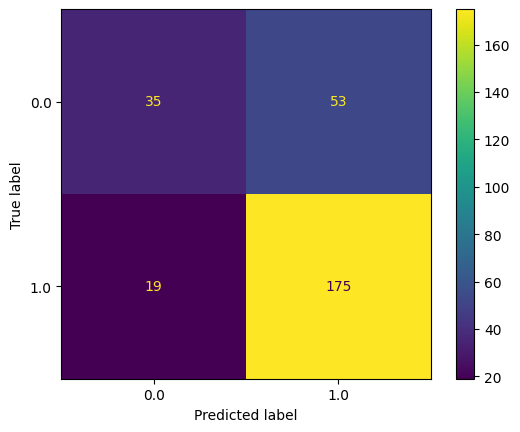

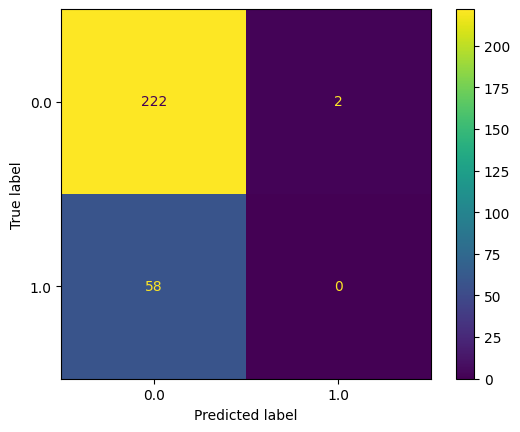

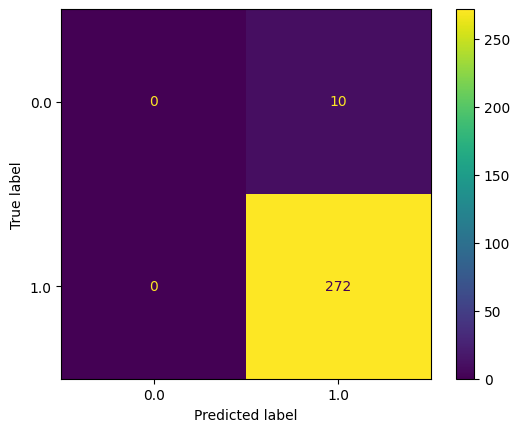

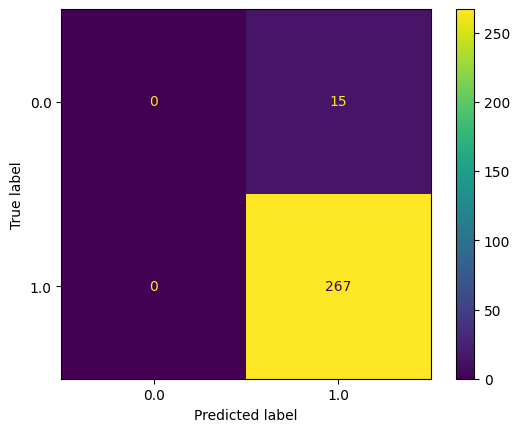

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_train_pred_balance_single = cross_val_predict(model_balance_single, X_train_balance_single, y_train_balance_single, cv=3)
y_train_pred_memory_complain = cross_val_predict(model_memory_complain, X_train_memory_complain,y_train_memory_complain, cv=3)
y_train_pred_house_suitable_participant = cross_val_predict(model_house_suitable_participant, X_train_house_suitable_participant,y_train_house_suitable_participant, cv=3)
y_train_pred_house_suitable_professional = cross_val_predict(model_house_suitable_professional, X_train_house_suitable_professional, y_train_house_suitable_professional, cv=3)


cm_balance_single = confusion_matrix( y_train_balance_single, y_train_pred_balance_single)
cm_memory_complain = confusion_matrix(y_train_memory_complain, y_train_pred_memory_complain)
cm_house_suitable_participant = confusion_matrix(y_train_house_suitable_participant, y_train_pred_house_suitable_participant)
cm_house_suitable_professional = confusion_matrix(y_train_house_suitable_professional, y_train_pred_house_suitable_professional)


print("balance_single")
ConfusionMatrixDisplay(cm_balance_single, display_labels=model_balance_single.classes_).plot()
print(classification_report(y_train_balance_single, y_train_pred_balance_single))


print("memory_complain")
ConfusionMatrixDisplay(cm_memory_complain, display_labels=model_memory_complain.classes_).plot()
print(classification_report(y_train_memory_complain, y_train_pred_memory_complain))


print("house_suitable_participant")
ConfusionMatrixDisplay(cm_house_suitable_participant, display_labels=model_house_suitable_participant.classes_).plot()
print(classification_report(y_train_house_suitable_participant, y_train_pred_house_suitable_participant))


print("house_suitable_professional")
ConfusionMatrixDisplay(cm_house_suitable_professional, display_labels=model_house_suitable_professional.classes_).plot()
print(classification_report(y_train_house_suitable_professional, y_train_pred_house_suitable_professional))




In [34]:
print(sub_set['balance_single'].value_counts())

balance_single
1.0    247
0.0    106
Name: count, dtype: int64


In [35]:
print(sub_set['memory_complain'].value_counts())

memory_complain
0.0    279
1.0     74
Name: count, dtype: int64


In [36]:
print(sub_set['house_suitable_participant'].value_counts())

house_suitable_participant
1.0    337
0.0     16
Name: count, dtype: int64


In [37]:
print(sub_set['house_suitable_professional'].value_counts())

house_suitable_professional
1.0    336
0.0     17
Name: count, dtype: int64


### The classifier trained to predict 'balance_single' has an excellent performance on class 1 and an adequate performance on class 0. It might worth a grid search to tune it and see if we can end up with an even better performance. The rest of the classifiers are far from ideal, the exhibit the same behavior which consists of classifying every instance to belong to the majority class even if it does not. This is probably happening because as we can see above for each of the features 'memory_complain', 'house_suitable_participant', 'house_suitable_professional' there is a big class imbalance between the classes, especially for 'house_suitable_professional' and 'house_suitable_participant'. Because of that, there are not enough training instances of some classes resulting in the model not having the ability to predict them. Using those three models to fill in the values would basically be the same as filling the missing values with the most frequent value (which we are going to do), so their usage is unnecessary.

### In summary, we are going to predict only the feature 'balance_single', and the missing values on all the other features will be imputed using the most frequent class.

### Filling missing values in 'memory_complain', 'house_suitable_participant', 'house_suitable_professional' with the most frequent category for each feature.

In [38]:
clinical['memory_complain'] = clinical['memory_complain'].apply(lambda x: 0 if pd.isna(x)  else x)
clinical['house_suitable_participant'] = clinical['house_suitable_participant'].apply(lambda x: 1 if pd.isna(x)  else x)
clinical['house_suitable_professional'] = clinical['house_suitable_professional'].apply(lambda x: 1 if pd.isna(x)  else x)

print(clinical.isna().sum())

part_id                                             0
fried                                               0
gender                                              0
age                                                 0
hospitalization_one_year                            0
hospitalization_three_years                         0
ortho_hypotension                                   0
vision                                              0
audition                                            0
weight_loss                                         0
exhaustion_score                                    0
raise_chair_time                                    0
balance_single                                     46
gait_get_up                                         0
gait_speed_4m                                       0
gait_optional_binary                                0
gait_speed_slower                                   0
grip_strength_abnormal                              0
low_physical_activity       

### The only missing values remaining can be found in 'balance_single'. Below, we filter the clinical dataset by keeping only the instances that have missing values. The labels ('balance_single' values) of these instances will be predicted using the classifier 'model_balance_single'.

In [39]:
clinical_missing_balance_single = clinical[clinical['balance_single'].isnull()] #containing only the instances that have missing value in balance_single

### Before we use the RandomForestClassifier 'model_balance_single' lets tune it's hyperparameters and also test it's performance on the corresponding test set. Hyperparameter tuning is implemented using GridsSearchCV(). The algorithm checks every possible combination of the hyperparameters specified in the 'param_grid' dictionary ( the different models are evaluated using cross validation) and returns the model with the best (according to the chosen 'scoring' parameter) hyperparameters.

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(estimator = model_balance_single, param_grid=param_grid, cv=3, scoring='recall_weighted') #using recall_weighted because there is class imbalance
grid.fit(X_train_balance_single, y_train_balance_single)



GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=200, n_jobs=-1),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300, 100, 200]},
             scoring='recall_weighted')

In [41]:
# Get the best hyperparameters and model
best_params = grid.best_params_
best_model = grid.best_estimator_
print(best_params)

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


balance_single_best
              precision    recall  f1-score   support

         0.0       0.67      0.39      0.49        88
         1.0       0.77      0.91      0.83       194

    accuracy                           0.75       282
   macro avg       0.72      0.65      0.66       282
weighted avg       0.74      0.75      0.73       282



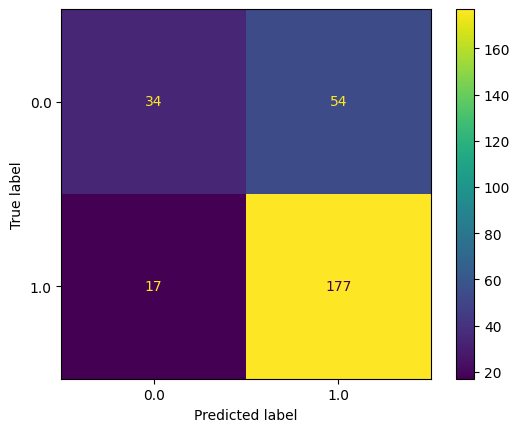

In [42]:
y_train_pred_balance_single_best = cross_val_predict(best_model, X_train_balance_single, y_train_balance_single, cv=3)

cm_balance_single_best = confusion_matrix( y_train_balance_single, y_train_pred_balance_single_best)

print("balance_single_best")
ConfusionMatrixDisplay(cm_balance_single_best, display_labels=best_model.classes_).plot()
print(classification_report(y_train_balance_single, y_train_pred_balance_single_best))


### There is no substantial difference in model performance but overall the tuned model behaves better. To conclude, we evaluate the performance on the test set.


balance_single_best_test
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.74      0.96      0.84        53

    accuracy                           0.72        71
   macro avg       0.37      0.48      0.42        71
weighted avg       0.55      0.72      0.62        71



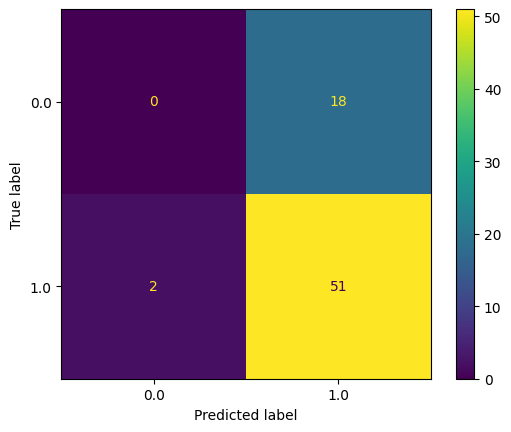

In [43]:
y_test_predict = best_model.predict(X_test_balance_single)

y_test_pred_balance_single_best = cross_val_predict(best_model, X_test_balance_single, y_test_balance_single, cv=3)

cm_balance_single_best_test = confusion_matrix( y_test_balance_single, y_test_pred_balance_single_best)

print("balance_single_best_test")
ConfusionMatrixDisplay(cm_balance_single_best_test, display_labels=best_model.classes_).plot()
print(classification_report(y_test_balance_single, y_test_pred_balance_single_best))


### We know that our model's ability to predict class 0 is limited due to the small number of instances of that class contained in the training set (compared to class 1), but when tested on the test set it fails to recognize every single one of them, but considering the low number of them (18) that is being tested on, we cannot conclude that this is an absolute bad model for predicting class 0. Cross validation performed above showed that it actually has a 39% recall, meaning that it can identify 39% of those instances with a fairly big precision (67%).

### Predicting the missing values:

In [44]:
clinical_missing_balance_single.drop(columns=['balance_single'],inplace=True)
part_id = clinical_missing_balance_single['part_id']
clinical_missing_balance_single.drop(columns=['part_id'],inplace=True)
predicted_missing_balance_single = best_model.predict(clinical_missing_balance_single )


C:\Users\Θανάσης\AppData\Local\Temp\ipykernel_14052\1911066425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_missing_balance_single.drop(columns=['balance_single'],inplace=True)
C:\Users\Θανάσης\AppData\Local\Temp\ipykernel_14052\1911066425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_missing_balance_single.drop(columns=['part_id'],inplace=True)


In [45]:
print(predicted_missing_balance_single,len(predicted_missing_balance_single))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.] 46


### The prediction takes place in a serial order, meaning that the first prediction belongs to the first row of the 'clinical_missing_balance_single' dataframe and that row's part_id value is the first value of the 'part_id' dataframe. Knowing that, we can match each prediction to the corresponding row in 'clinical' dataframe using the unique 'part_id' indeces.

In [46]:
print(type(predicted_missing_balance_single),type(part_id))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [47]:
df1 = pd.DataFrame({'balance_single_predicted': predicted_missing_balance_single})
df2 = pd.DataFrame({'part_id': part_id})
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

result = pd.concat([df2, df1], axis=1)
result['part_id'] = result['part_id'].astype(int)
result['balance_single_predicted'] = result['balance_single_predicted'].astype(int)

print(result)


    part_id  balance_single_predicted
0      1008                         0
1      1016                         0
2      1018                         0
3      1019                         1
4      1021                         0
5      1024                         0
6      1025                         0
7      1028                         0
8      1032                         0
9      1034                         0
10     1037                         0
11     1056                         0
12     1062                         0
13     1063                         0
14     1064                         0
15     1065                         0
16     1067                         0
17     1069                         0
18     1070                         0
19     1071                         0
20     1072                         0
21     1073                         0
22     1074                         0
23     1075                         0
24     1076                         0
25     1077 

In [48]:
# Merge DataFrames and fill missing values.
clinical = clinical.merge(result, on='part_id', how='left')
clinical['balance_single'].fillna(clinical['balance_single_predicted'], inplace=True)
clinical.drop(columns=['balance_single_predicted'], inplace=True)



In [49]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 57 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   part_id                                          526 non-null    float64
 1   fried                                            526 non-null    int32  
 2   gender                                           526 non-null    int32  
 3   age                                              526 non-null    float64
 4   hospitalization_one_year                         526 non-null    float64
 5   hospitalization_three_years                      526 non-null    float64
 6   ortho_hypotension                                526 non-null    int32  
 7   vision                                           526 non-null    int32  
 8   audition                                         526 non-null    int32  
 9   weight_loss                     

### We have successfully cleaned the dataset, filled in all missing numerical values and encoded the categorical attributes

In [50]:
clinical.to_csv('clinical_dataset_cleaned.csv',index=False)